In [9]:

pip install upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [ ]:
pip install pywrap

In [1]:
#importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [36]:

#make normalize 
X_train=X_train/255


X_test=X_test/255


In [37]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


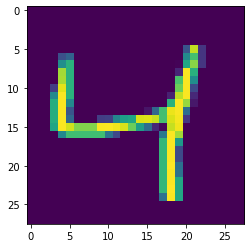

In [38]:
plt.imshow(X_train[2])

In [39]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [40]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [42]:
# Build the CNN model
model_normalize = Sequential()
# Add model layers
model_normalize.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model_normalize.add(Conv2D(32, kernel_size=3, activation='relu'))
model_normalize.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model_normalize.add(Flatten())
model_normalize.add(Dense(10,activation='softmax'))

In [43]:
model_normalize.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
#Train the model with normalize
hist = model_normalize.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0463 - val_accuracy: 0.9848
Epoch 2/5
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0417 - val_accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0380 - val_accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0452 - val_accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0464 - val_accuracy: 0.9868


In [47]:
loss, accuracy = model_normalize.evaluate(X_test,y_test_one_hot)
print('Test accuracy:' , accuracy * 100,'%')

313/313 [==============================] - 7s 21ms/step - loss: 0.0464 - accuracy: 0.9868
Test accuracy: 98.68000149726868 %


In [ ]:
#model without normalition

In [28]:
#Train the model without normalize
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 189s 100ms/step - loss: 0.2639 - accuracy: 0.9495 - val_loss: 0.0795 - val_accuracy: 0.9752
Epoch 2/5
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0771 - accuracy: 0.9759 - val_loss: 0.0731 - val_accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0559 - accuracy: 0.9827 - val_loss: 0.0732 - val_accuracy: 0.9796
Epoch 4/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0716 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0783 - val_accuracy: 0.9808


In [34]:
loss, accuracy = model.evaluate(X_test,y_test_one_hot)
print('Test accuracy:' , accuracy * 100,'%')

313/313 [==============================] - 7s 22ms/step - loss: 0.0783 - accuracy: 0.9808
Test accuracy: 98.07999730110168 %


In [ ]:
#